In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings

In [5]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [11]:
!ls -alF input/

total 93772
drwxrwxrwx 1 kawhigoat kawhigoat      512 Sep  8 23:31 ./
drwxrwxrwx 1 kawhigoat kawhigoat      512 Sep  9 21:14 ../
-rw-rw-rw- 1 kawhigoat kawhigoat   800010 Sep  8 23:31 sample_submission.csv
-rw-rw-rw- 1 kawhigoat kawhigoat 18936246 Sep  8 23:31 test.csv
-rw-rw-rw- 1 kawhigoat kawhigoat 76278443 Sep  8 23:31 train.csv


In [11]:
data_dir = Path('input/')
feature_dir = Path('feature/')
trn_file = data_dir/'train.csv'
tst_file = data_dir/'test.csv'
feature_file=feature_dir/'feature.csv'
seed=42

In [27]:
trn =pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


In [14]:
trn.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
319995,18.3656,17.2409,16.7739,16.4850,16.3404,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,2,2,1.0930,1.0888,1.0973,1.0951,1.0909,2
319996,18.6856,17.6658,17.1904,16.8169,16.6367,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,2,2,1.0517,1.0508,1.0526,1.0522,1.0513,1
319997,21.1890,18.4234,17.2956,16.9011,16.6841,-1.0148e-05,20.9890,18.3076,17.2152,16.8403,16.6355,31,30,1.1933,1.1941,1.1925,1.1929,1.1937,0
319998,18.8472,17.3186,16.5057,16.1806,15.9116,-4.5209e-05,16.3900,15.4058,15.1823,15.1969,15.1793,1,1,1.1725,1.1726,1.1725,1.1725,1.1725,0
319999,19.8604,18.8199,18.5156,18.4149,18.3080,-9.6544e-04,19.8256,18.7819,18.4908,18.3987,18.3098,1,1,1.0571,1.0562,1.0580,1.0575,1.0567,0


In [14]:
trn.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,3.2000e+05,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000
mean,19.8524,18.3768,17.7358,17.1742,16.8752,5.8308e-02,19.6289,18.2271,17.6154,17.1523,16.8693,6.3327,6.1388,1.1758,1.1765,1.1751,1.1754,1.1761,1.1163
std,1.9455,31.1108,1.4662,52.5615,57.1463,5.7546e-01,1.9236,17.7866,1.4730,25.0758,35.4365,8.8811,8.5516,0.1163,0.1181,0.1147,0.1155,0.1172,0.9235
min,-17.6875,-17555.3656,7.7314,-23955.8178,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,1.0000,1.0000,1.0001,1.0000,1.0002,1.0001,1.0000,0.0000
25%,18.7242,17.4749,16.8772,16.5239,16.2889,3.5580e-05,18.5636,17.3484,16.7871,16.4530,16.2341,1.0000,1.0000,1.0882,1.0884,1.0878,1.0880,1.0883,0.0000
50%,19.4194,18.1405,17.5258,17.1497,16.9176,4.7129e-02,19.2646,18.0224,17.4434,17.0874,16.8694,2.0000,2.0000,1.1793,1.1792,1.1794,1.1794,1.1793,1.0000
75%,20.4321,19.0732,18.4281,18.0074,17.7289,9.4597e-02,20.1976,18.8884,18.2911,17.9070,17.6557,5.0000,5.0000,1.2275,1.2260,1.2292,1.2286,1.2268,2.0000
max,58.6233,46.3383,72.0097,50.1641,52.6127,6.2323e+01,30.7779,30.6132,31.9572,32.0162,30.7813,44.0000,42.0000,2.0508,2.0803,2.0221,2.0363,2.0654,2.0000


In [15]:
trn.dtypes

u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

In [16]:
trn['class'].value_counts().sort_index()

0    119996
1     42785
2    157219
Name: class, dtype: int64

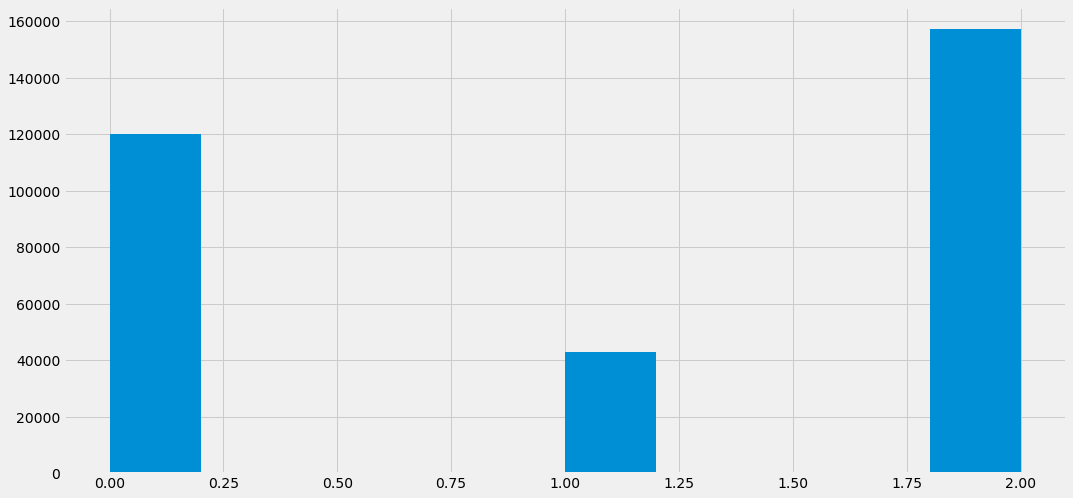

In [17]:
trn['class'].hist()

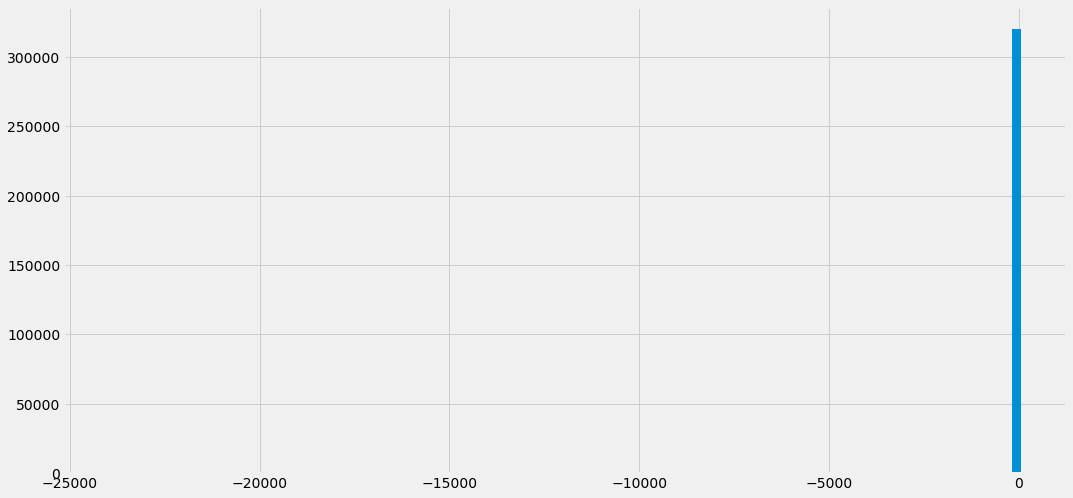

In [18]:
trn['i'].hist(bins=100)

In [19]:
np.arange(0,1, .01)[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [20]:
trn['i'].quantile(np.arange(0,1, .01))

0.00   -23955.8178
0.01       14.4575
0.02       14.8731
0.03       15.0952
0.04       15.2494
           ...    
0.95       19.6769
0.96       19.8682
0.97       20.0562
0.98       20.2517
0.99       20.6046
Name: i, Length: 100, dtype: float64

In [25]:
trn.loc[trn['i']<0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
107428,19.3774,18.2789,17.9404,-23955.8178,-23955.8178,0.0671,19.1142,18.1270,17.8280,-9999.0000,-9999.0000,5,4,1.3060,1.3121,1.3002,1.3031,1.3090,2
134102,18.0590,19.3009,19.0443,-5.4550,13.4289,0.0349,18.0384,19.4843,19.3937,23.6095,24.1169,1,1,1.0693,1.0710,1.0678,1.0685,1.0701,2
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,0.0932,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
181371,14.6680,14.0357,13.7587,-23.9024,13.5329,0.0007,14.5893,13.9768,13.7133,24.4559,13.5264,2,2,1.2933,1.2867,1.3000,1.2966,1.2900,1


In [29]:
trn_sample = trn.sample(n=10000, random_state=seed)

In [12]:
feature = pd.read_csv(feature_file, index_col=0)
feature.head()

,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,0
1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,0
2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,0
3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,1
4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,1
